In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from LLS import lls


    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [4]:
data = pd.read_csv('data/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
#plt.figure(figsize=(15,15))
#sns.heatmap(crr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='RdBu')

NameError: name 'crr' is not defined

<Figure size 1500x1500 with 0 Axes>

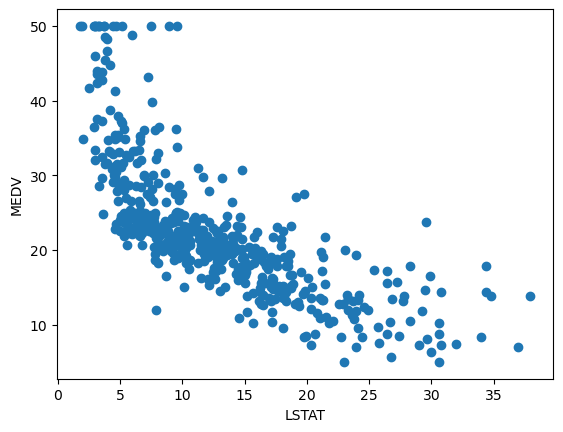

In [7]:
plt.scatter(data['lstat'],data['medv'])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [10]:
X_train = np.array([data["lstat"], data["rm"]])
Y_train = np.array(data["medv"])
X_train.shape

(2, 506)

In [12]:
X_train = X_train.reshape(-1, 2)
X_train.shape

(506, 2)

In [13]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T , X_train)), X_train.T), Y_train)

In [14]:
w

array([0.5676962 , 1.30633377])

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')


ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, cmap="YlGn")
lstat = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
rm = np.linspace(min(X_train[:, 1]), max(X_train[:, 1]), 100)
lstat_mesh, rm_mesh = np.meshgrid(lstat, rm)
ax.plot(X_train, w * X_train, color = "red")

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')
ax.plot_surface(X_train[:, 0] ,X_train[:, 1] ,Y_train , alpha=0.3)

plt.title('Regression Plane for 2 Features')
ax.legend()


plt.show()


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1012,)  and requested shape (506,)

Error in callback <function _draw_all_if_interactive at 0x000001E591F42950> (for post_execute):


AttributeError: 'Line3D' object has no attribute '_verts3d'

AttributeError: 'Line3D' object has no attribute '_verts3d'

<Figure size 1000x1000 with 1 Axes>